In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import statsmodels.api as sm
import matplotlib as mpl

## K-Means Clustering
- 독립 변수의 특성이 유사한 데이터의 그룹을 클러스터라고 한다.
- 주어진 데이터를 여러개의 클러스터로 나누는 것을 클러스터링이라고 한다.


- k-means clustering은 가장 단순하고 빠른 알고리즘 중 하나이다.
- 목적함수의 값이 최소화될 때까지 클러스터의 중심(centroid)과 각 데이터가 소속될 클러스터를 반복해서 찾는 것이다.
- 목적함수는 두 데이터의 비유사도(dissimilarity),거리(distance)로 정의된다.

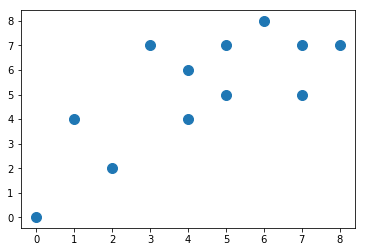

In [2]:
X = np.array([[7, 5], [5, 7], [7, 7], [4, 4], [4, 6], [1, 4],
              [0, 0], [2, 2], [8, 7], [6, 8], [5, 5], [3, 7]])
plt.scatter(X[:, 0], X[:, 1], s=100)
plt.show()

In [3]:
from sklearn.cluster import KMeans

first trial

In [4]:
model1 = KMeans(n_clusters=2, init="random", n_init=1,
               max_iter=1, random_state=1).fit(X)
# n_clusters=8, init='k-means++', n_init=10, max_iter=300, 
# tol=0.0001, precompute_distances='auto', verbose=0, random_state=None, 
# copy_x=True, n_jobs=1, algorithm='auto'

In [8]:
c0, c1 = model1.cluster_centers_
c0, c1

(array([6.6, 6.8]), array([2.71428571, 4.        ]))

In [9]:
model1.score(X)
# Opposite of the value of X on the K-means objective.

-63.00408163265301

In [10]:
def plot_cluster(model, c0, c1):
    plt.scatter(X[model.labels_ == 0, 0],
                X[model.labels_ == 0, 1], s=100, marker='v', c='r')
    plt.scatter(X[model.labels_ == 1, 0],
                X[model.labels_ == 1, 1], s=100, marker='^', c='b')
    plt.scatter(c0[0], c0[1], s=200, c="r")
    plt.scatter(c1[0], c1[1], s=200, c="b")
    plt.show()

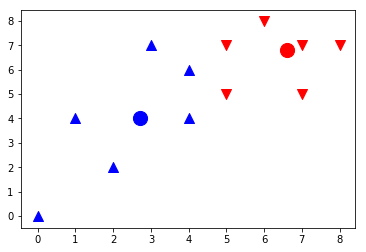

In [11]:
plot_cluster(model1, c0, c1)

In [12]:
model2 = KMeans(n_clusters=2, init="random", n_init=1,
               max_iter=2, random_state=1).fit(X)

In [13]:
c0, c1 = model2.cluster_centers_
c0, c1

(array([6.33333333, 6.5       ]), array([2.33333333, 3.83333333]))

In [14]:
model2.score(X)


-59.22222222222216

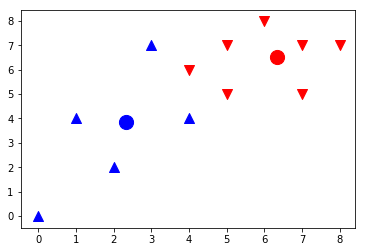

In [15]:
plot_cluster(model2, c0, c1)


In [16]:
model3 = KMeans(n_clusters=2, init="random", n_init=1,
               max_iter=3, random_state=1).fit(X)

In [17]:
c0, c1 = model3.cluster_centers_
c0, c1

(array([6.        , 6.42857143]), array([2. , 3.4]))

In [18]:
model3.score(X)


-52.2808163265307

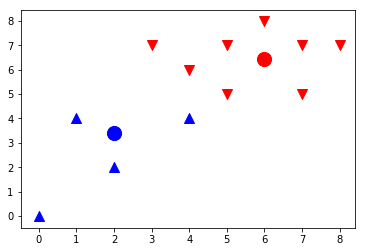

In [19]:
plot_cluster(model3, c0, c1)


## K-Means++
- 최초의 중심값을 설정하기 위한 알고리즘이다.
    - `1. 중심값을 저장할 집합을 준비
    - `2. 일단 하나의 중심을 랜덤하게 선택해서 집합에 넣는다.
    - `3. 해당 집합에 속하지 않는 모든 샘플에 대해서 그 중심과 거리를 계산한다. 그 중에 최솟값을 선택한다.
    - `4. 그 거리에 비례한 확률로 다음 중심 집합을 선택한다.
    - `5. K개의 중심을 선택할 때까지 반복한다.
    - `6. K-Means 알고리즘을 사용

In [20]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn import datasets

np.random.seed(5)
centers = [[1, 1], [-1, -1], [1, -1]]
iris = datasets.load_iris()
X = iris.data
y = iris.target


def plot_iris_cluster(model):
    fig = plt.figure()
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    model.fit(X)
    labels = model.labels_
    ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=labels.astype(
        np.float), s=100, cmap=mpl.cm.jet)
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Petal width')
    ax.set_ylabel('Sepal length')
    ax.set_zlabel('Petal length')
    plt.show()

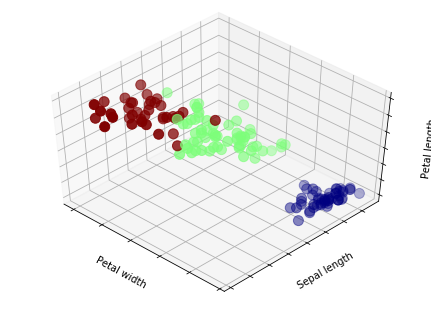

In [24]:
model3 = KMeans(n_clusters=3)
plot_iris_cluster(model3)

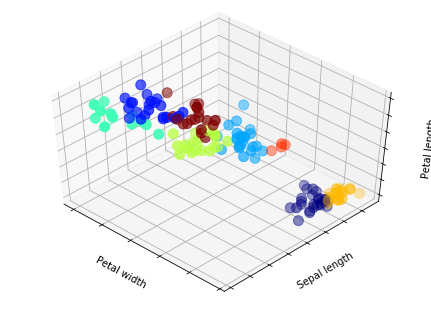

In [25]:
model8 = KMeans(n_clusters=8)
plot_iris_cluster(model8)